In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# set fresh env for keras install Python >= 3.9 | TensorFlow = Version: 2.14.0 | Keras-ocr = Version: 0.9.2
import os, sys
sys.path.append('../scripts/')
import keras_ocr
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# not setup with cuda yet

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
8/8 [==============================] - 14s 2s/step


<Axes: >

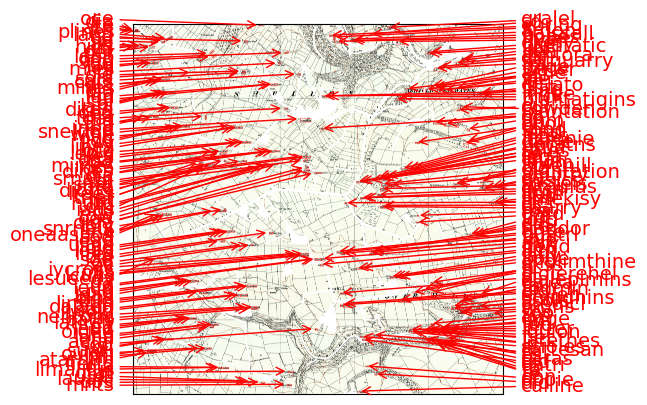

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read("../content/tifs/189226695.27_clip.tif")
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [5]:
df = pd.DataFrame(prediction_groups)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,"(oce, [[2396.6719, 13.65625], [2451.2969, 13.6...","(gralel, [[4813.828, 54.625], [4909.422, 54.62...","(dia, [[40.96875, 102.421875], [88.765625, 102...","(lte, [[6.828125, 129.73438], [68.28125, 129.7...","(atn, [[75.109375, 129.73438], [122.90625, 129...","(sd, [[4472.422, 184.35938], [4520.2188, 184.3...","(epring, [[3714.5, 204.84375], [3823.75, 204.8...","(plines, [[659.2672, 262.05872], [740.4983, 22...","(s, [[3789.6094, 238.98438], [3823.75, 238.984...","(land, [[589.95013, 305.9], [655.5002, 273.125...",...,"(dooie, [[4397.3125, 6459.4062], [4486.078, 64...","(dia, [[1611.4375, 6486.7188], [1666.0625, 648...","(limalilus, [[1672.8906, 6486.7188], [1809.453...","(gtat, [[2937.354, 6558.572], [3040.7214, 6571...","(did, [[4568.0156, 6609.625], [4615.8125, 6609...","(ull, [[2171.3438, 6746.1875], [2225.9688, 674...","(lauakl, [[2239.625, 6746.1875], [2355.7031, 6...","(dos, [[2417.1562, 6766.672], [2485.4375, 6766...","(mnts, [[2915.6094, 6807.6406], [2997.5469, 68...","(culline, [[4267.578, 6937.375], [4390.4844, 6..."


### Test on Patchify

In [4]:
# test on 5 sample patches
images = [
    keras_ocr.tools.read(img) for img in ["../content/tifs/patches/patch-0-2000-500-2500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-1500-3500-2000-4000-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-2000-4000-2500-4500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-4500-6000-5000-6500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-7000-5000-7448-5500-#189226695.27_clip.tif#.png"]]

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
2/2 [==============================] - 2s 404ms/step


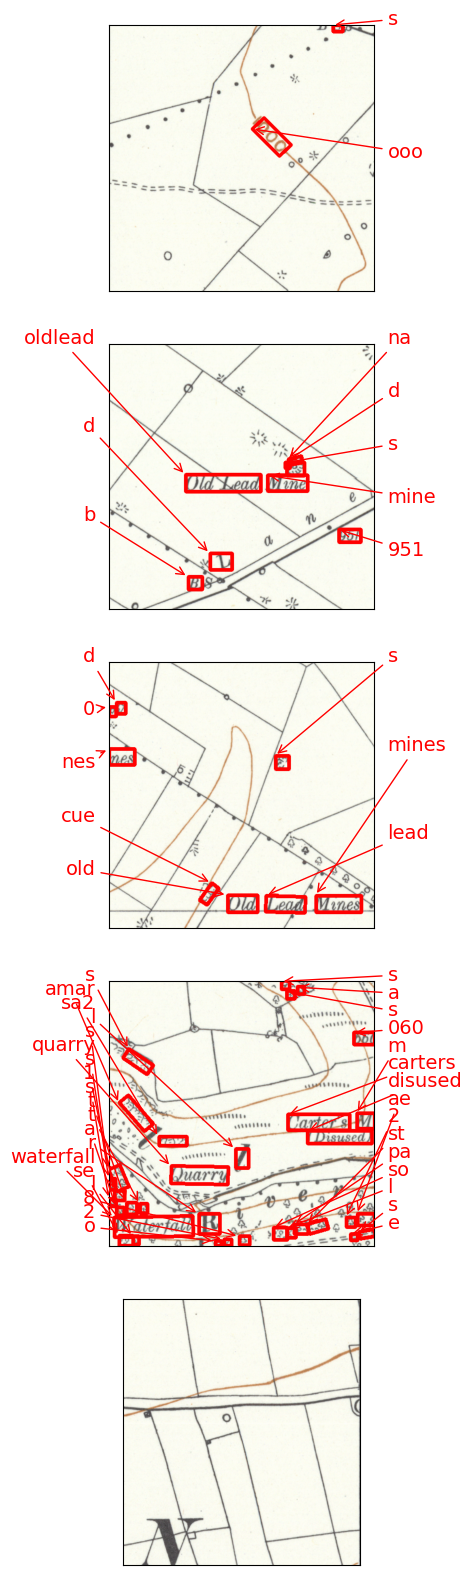

In [6]:
pipeline = keras_ocr.pipeline.Pipeline()
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)